In [4]:
# Core libraries
import pandas as pd
import numpy as np

# Charting, Ploting
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Management of Shape files
import shapefile

# Plotting of Geographical data via Leaflet-like interface
import folium

# Pandas-like handling of Geographical data
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Logging, Debug Support
import logging
from pprint import pprint

# Database
from flask_sqlalchemy import SQLAlchemy
from sqlalchemy.sql.expression import func, and_, or_
from sqlalchemy.sql.functions import coalesce

# Other libraries
from datetime import datetime, date
from dateutil import tz, parser

import requests
from requests.utils import quote

import json
import time
import os


# FCC Broadband Map API - Discontinued and Replaced - see below...
* API Description: https://anypoint.mulesoft.com/exchange/portals/fccdomain/55a35f65-7efa-42af-98af-41ae37d824b2/broadband-map/1.0.0/console/method/%23703/ 
* API Endpoint: https://www.broadbandmap.gov/broadbandmap/almanac/parameters

In [2]:
url = 'https://www.broadbandmap.gov/broadbandmap/almanac/parameters'
req = requests.get(url)

In [3]:
pprint(req.status_code)

200


In [4]:
pprint(req.headers)

{'Content-Language': 'en', 'Content-Type': 'text/html; charset=utf-8', 'Link': '<https://www.fcc.gov/news-events/blog/2018/12/07/decommissioning-national-broadband-map-and-its-apis>; rel="canonical",<https://www.fcc.gov/node/228009>; rel="shortlink"', 'Public-Key-Pins': 'pin-sha256="mImc8gutPeuOa7vf+y4jGz/W9TdFGfVFK7E18NYBc3U="; pin-sha256="PbNCVpVasMJxps3IqFfLTRKkVnRCLrTlZVc5kspqlkw="; max-age=5184000; includeSubDomains', 'Server': 'Apache', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains, max-age=31536000', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-Frame-Options': 'SAMEORIGIN', 'X-UA-Compatible': 'IE=edge', 'X-XSS-Protection': '1; mode=block', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Cache-Control': 'no-cache, must-revalidate', 'Expires': 'Wed, 12 Jun 2019 15:34:19 GMT', 'Date': 'Wed, 12 Jun 2019 15:34:19 GMT', 'Content-Length': '12921', 'Connection': 'keep-alive'}


In [5]:
pprint(req.text)

('<!DOCTYPE html>\n'
 '<!--[if IEMobile 7]><html class="iem7"  lang="en" dir="ltr"><![endif]-->\n'
 '<!--[if lte IE 6]><html class="lt-ie9 lt-ie8 lt-ie7"  lang="en" '
 'dir="ltr"><![endif]-->\n'
 '<!--[if (IE 7)&(!IEMobile)]><html class="lt-ie9 lt-ie8"  lang="en" '
 'dir="ltr"><![endif]-->\n'
 '<!--[if IE 8]><html class="lt-ie9"  lang="en" dir="ltr"><![endif]-->\n'
 '<!--[if (gte IE 9)|(gt IEMobile 7)]><!--><html  lang="en" dir="ltr" '
 'prefix="og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: '
 'http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: '
 'http://ogp.me/ns/video# product: http://ogp.me/ns/product# content: '
 'http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: '
 'http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: '
 'http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: '
 'http://www.w3.org/2004/02/skos/core# xsd: '
 'http://www.w3.org/2001/XMLSchema#"><!--<![endif]-->\n'
 '\n'
 '<

# FCC - Fixed Broadband Map
* See: https://broadbandmap.fcc.gov/#/about

In [6]:
# !pip install -U pyshp

In [7]:
# Dependencies

# Python library for managing shapefiles
# import shapefile

## Read a shapefile

In [8]:
# Input file path - example
i_file_base_path = "C:/Users/Jeff/OneDrive/Documents/1-NW Boot Camp/PROJECTS/CommTrends/FCC - Mobile Deployment Form 477 Data/"
i_file_vendor_path = "F477_2017_12_Broadband_VerizonWireless/F477_2017_12_Broadband_VerizonWireless_83/"
i_file_name = "VerizonWireless_83"
i_file_extensions = ["dbf", "shp", "shx", "prj"]

In [9]:
# Build the file name -- without extension, which is ok for shapefile
i_file_full = i_file_base_path + i_file_vendor_path + i_file_name
i_file_full

'C:/Users/Jeff/OneDrive/Documents/1-NW Boot Camp/PROJECTS/CommTrends/FCC - Mobile Deployment Form 477 Data/F477_2017_12_Broadband_VerizonWireless/F477_2017_12_Broadband_VerizonWireless_83/VerizonWireless_83'

In [10]:
sf = shapefile.Reader(i_file_full)


## Inspect the list of Shape objects

In [11]:
# Determine the shape type for the items in the shapefile
# List of types: https://pypi.org/project/pyshp
#     NULL = 0
#     POINT = 1
#     POLYLINE = 3
#     POLYGON = 5
#     MULTIPOINT = 8
#     POINTZ = 11
#     POLYLINEZ = 13
#     POLYGONZ = 15
#     MULTIPOINTZ = 18
#     POINTM = 21
#     POLYLINEM = 23
#     POLYGONM = 25
#     MULTIPOINTM = 28
#     MULTIPATCH = 31

print( f"'{sf.shapeType}', '{sf.shapeTypeName}'" )

'5', 'POLYGON'


In [12]:
# Checking shapefile type vs. defined num values
sf.shapeType == shapefile.POLYGON

True

In [13]:
# Number of elements in the shapefile
len(sf)

2584035

In [14]:
# Buonding box for all of the shapes in this shapefile
sf.bbox

[-160.23526766105485, 18.910790443280803, -67.38925460431676, 65.47669412893062]

In [15]:
# Converting shapefile to GeoJSON format
# sf_geojson = sf.__geo_interface__
# TAKES A LONG TIME!

In [16]:
# Get the shapes in this shapefile
shapes = sf.shapes()

In [17]:
len(shapes)

2584035

In [18]:
# Bounding box of a shape
shapes[7].bbox

[-155.67955292993253, 19.129511205027256, -155.6783921607729, 19.13061446930073]

In [19]:
# Points in this shape
shapes[7].points

[(-155.6783921607729, 19.13059388006576),
 (-155.67841382740386, 19.129511205027256),
 (-155.67955292993253, 19.1295317933629),
 (-155.67953127139552, 19.130614469300724),
 (-155.6783921607729, 19.13059388006576)]

In [20]:
# Parts in this shape
shapes[7].parts

[0]

In [21]:
# Shape type in this shape
shapes[7].shapeTypeName

'POLYGON'

In [22]:
# Convert this shape to a GeoJSON format
shape_geojson = shapes[7].__geo_interface__
shape_geojson['type']

'Polygon'

In [23]:
shape_geojson

{'type': 'Polygon',
 'coordinates': (((-155.6783921607729, 19.13059388006576),
   (-155.67841382740386, 19.129511205027256),
   (-155.67955292993253, 19.1295317933629),
   (-155.67953127139552, 19.130614469300724),
   (-155.6783921607729, 19.13059388006576)),)}

## Inspect the Metadata associated with the shapes

In [24]:
# Get the fields in the metadata associated with this shapefile
sf.fields

[('DeletionFlag', 'C', 1, 0), ['DBA', 'C', 254, 0], ['TECHNOLOGY', 'N', 10, 0]]

In [25]:
# Access the 8th record in the shapefile
sf.record(7)

Record #7: ['VerizonWireless', 83]

In [26]:
# Access a field for a specific record
sf.record(7).DBA

'VerizonWireless'

In [27]:
# Python process Priority: High
# All processors: 1min 42sec
# CPU3 only: 1min 43sec -- CPU3 at 100%
# CPU7 only: 1min 41sec -- CPU7 at 100%
# CPU3 & CPU7: 1min 42sec -- Only CPU3 showing near ~100%; CPU7 showing almost no occupancy
# CPU2 & CPU3: 1min 44sec -- CPU2 and CPU3 trade-off operating at ~100% while other has low occupancy
list_of_dba = list(set( [ s.record.DBA for s in sf ] ))
list_of_dba


['VerizonWireless']

In [28]:
list_of_tech = list(set( [ s.record.TECHNOLOGY for s in sf ] ))
list_of_tech

[83]

In [29]:
# Access a field for a specific record
sf.record(7).TECHNOLOGY

83

In [30]:
# Convert a record to a dictionary
print( sf.record(7).as_dict() )

{'DBA': 'VerizonWireless', 'TECHNOLOGY': 83}


In [31]:
# Iterate over several records

In [32]:
count = 0
geo_js = []
for shapeRec in sf.iterShapeRecords():
    count += 1
    geo_js.append( shapeRec.__geo_interface__ )
    
    if count > 100:
        break
        
pprint( geo_js )

[{'geometry': {'coordinates': (((-155.68959319923994, 19.08314058305797),
                                (-155.6896147345689, 19.08205788913358),
                                (-155.69075352503046, 19.082078359657146),
                                (-155.69073199779547, 19.08316105448091),
                                (-155.68959319923994, 19.08314058305797)),),
               'type': 'Polygon'},
  'properties': {'DBA': 'VerizonWireless', 'TECHNOLOGY': 83},
  'type': 'Feature'},
 {'geometry': {'coordinates': (((-155.63749481289562, 19.12443481555448),
                                (-155.63747288725793, 19.125517445626542),
                                (-155.63633386027288, 19.12549660098216),
                                (-155.63635579490386, 19.124413970910098),
                                (-155.63749481289562, 19.12443481555448)),),
               'type': 'Polygon'},
  'properties': {'DBA': 'VerizonWireless', 'TECHNOLOGY': 83},
  'type': 'Feature'},
 {'geometry': 

 {'geometry': {'coordinates': (((-155.64215953458125, 19.17542269622936),
                                (-155.64218149169545, 19.17434006705662),
                                (-155.64332086042546, 19.174360925190967),
                                (-155.6432989105059, 19.17544355616235),
                                (-155.64215953458125, 19.17542269622936)),),
               'type': 'Polygon'},
  'properties': {'DBA': 'VerizonWireless', 'TECHNOLOGY': 83},
  'type': 'Feature'},
 {'geometry': {'coordinates': (((-155.64443828732988, 19.175464410699362),
                                (-155.64446023005482, 19.17438177972798),
                                (-155.64559960148281, 19.174402624372362),
                                (-155.64557766595252, 19.175485258041704),
                                (-155.64443828732988, 19.175464410699362)),),
               'type': 'Polygon'},
  'properties': {'DBA': 'VerizonWireless', 'TECHNOLOGY': 83},
  'type': 'Feature'},
 {'geometry'

 {'geometry': {'coordinates': (((-155.69766659675318, 19.192676945502456),
                                (-155.69768821122307, 19.191594256074723),
                                (-155.69882776341618, 19.19161479045067),
                                (-155.69880615524158, 19.192697479878404),
                                (-155.69766659675318, 19.192676945502456)),),
               'type': 'Polygon'},
  'properties': {'DBA': 'VerizonWireless', 'TECHNOLOGY': 83},
  'type': 'Feature'}]


In [33]:
type(geo_js)

list

# Plotting the Geographical Data

## Plot Example - Folium

In [34]:
# Use folium to draw a basic map
# Atlanta coordinates: location=[33.749249, -84.387314]
# Various 'tiles' for different map formating, including tiles='Stamen Toner' or 'Stamen Terrain'
m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=12
)

In [35]:
tooltip = 'Click me!'

folium.Marker(
    location=[45.3288, -121.6625],
    popup='Mt. Hood Meadows',
    tooltip='Click for Additional Information',
    icon=folium.Icon(icon='cloud')
).add_to(m)

folium.Marker(
    location=[45.3311, -121.7113],
    popup='Timberline Lodge',
    tooltip='Click for Additional Information',
    icon=folium.Icon(color='green')
).add_to(m)

folium.Marker(
    location=[45.3300, -121.6823],
    popup='Some Other Location',
    tooltip='Click for Additional Information',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)


folium.Circle(
    radius=100,
    location=[45.5244, -122.6699],
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[45.5215, -122.6261],
    radius=50,
    popup='Laurelhurst Park',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(m)



In [36]:
# A Latitude/Longitude popup to help a user identify locations
m.add_child(folium.LatLngPopup())

In [37]:
m.add_child(folium.ClickForMarker(popup='Waypoint'))

In [38]:
m

In [39]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)
m

In [40]:
state_data.head(10)

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


## Plotting Fixed Broadband Map Data - Folium

In [41]:
geojson_data = {
    'type':'FeatureCollection',
    'features': geo_js
}

In [42]:
pprint(geojson_data)

{'features': [{'geometry': {'coordinates': (((-155.68959319923994,
                                              19.08314058305797),
                                             (-155.6896147345689,
                                              19.08205788913358),
                                             (-155.69075352503046,
                                              19.082078359657146),
                                             (-155.69073199779547,
                                              19.08316105448091),
                                             (-155.68959319923994,
                                              19.08314058305797)),),
                            'type': 'Polygon'},
               'properties': {'DBA': 'VerizonWireless', 'TECHNOLOGY': 83},
               'type': 'Feature'},
              {'geometry': {'coordinates': (((-155.63749481289562,
                                              19.12443481555448),
                                         

                                             (-155.68595501738446,
                                              19.15130883044185),
                                             (-155.68604157688821,
                                              19.146978103308015),
                                             (-155.6871808071216,
                                              19.1469986628652)),),
                            'type': 'Polygon'},
               'properties': {'DBA': 'VerizonWireless', 'TECHNOLOGY': 83},
               'type': 'Feature'},
              {'geometry': {'coordinates': (((-155.68694279703996,
                                              19.15890816653007),
                                             (-155.68580348226968,
                                              19.15888759438235),
                                             (-155.68582513541074,
                                              19.15780491394787),
                                          

                                             (-155.76743620170137,
                                              19.180923427730875),
                                             (-155.76745734672159,
                                              19.17984066006153),
                                             (-155.76859689801537,
                                              19.179860749269665)),),
                            'type': 'Polygon'},
               'properties': {'DBA': 'VerizonWireless', 'TECHNOLOGY': 83},
               'type': 'Feature'},
              {'geometry': {'coordinates': (((-155.76625433518592,
                                              19.18306886127084),
                                             (-155.76627549099808,
                                              19.18198609809815),
                                             (-155.76741505488246,
                                              19.1820061945009),
                                        

In [43]:
set([ f['properties']['TECHNOLOGY'] for f in geojson_data['features'] ])

{83}

In [44]:
carrier_df = pd.DataFrame.from_dict( {
    'DBA': ['VerizonWireless'],
    'TECHNOLOGY': [83]
})
carrier_df

,DBA,TECHNOLOGY
0,VerizonWireless,83


In [45]:
m = folium.Map(location=[19.08314058305797, -155.68959319923994], zoom_start=13)

folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=carrier_df,
    columns=['DBA', 'TECHNOLOGY'],
    key_on='feature.DBA',
    line_color='blue',
    fill_color='YlGn',
    fill_opacity=0.6,
    line_opacity=1.0,
    legend_name='Wireless Coverage',
    overlay = True,
    control = True,
    show = True,
    highlight = True
).add_to(m)

# A Latitude/Longitude popup to help a user identify locations
m.add_child(folium.LatLngPopup())

## Plotting Fixed Broadband Map Data - Matplotlib

In [46]:
len(shapes)

2584035

In [47]:
sf.bbox

[-160.23526766105485, 18.910790443280803, -67.38925460431676, 65.47669412893062]

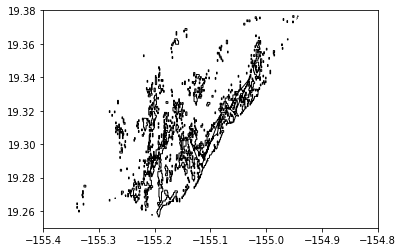

1001


In [48]:
# Initializing Display
fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlim([-155.4, -154.8])
plt.ylim([19.25, 19.38])

i=0

for a_shape in shapes:
    # Finding Points
    sh_points = a_shape.points
#     pprint(sh_points)

    # Creating Polygon
    ap = plt.Polygon(sh_points, fill=False, edgecolor="k")
    ax.add_patch(ap)

    i += 1
#     print(f"Plotted Shape #{i}")

    if i> 1000:
        break

# Displaying Polygons
plt.show()
print(i)

## Plotting Example - GeoPandas

In [43]:
# Read map data from NaturalEarth into a GeoDataFrame - geographical features
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [44]:
# Read map data from NaturalEarth into a GeoDataFrame - major cities
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


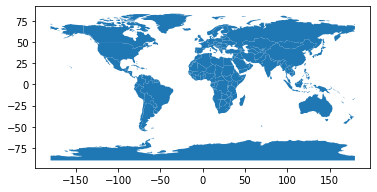

In [45]:
world.plot()

In [46]:
world = world[(world.pop_est>0) & (world.name != "Antarctica")]

In [47]:
# Calculate GDP/Population Estimate
world['GDP_Per_Capita'] = world.gdp_md_est / world.pop_est

In [48]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,GDP_Per_Capita
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0.005993
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0.038408
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.014027


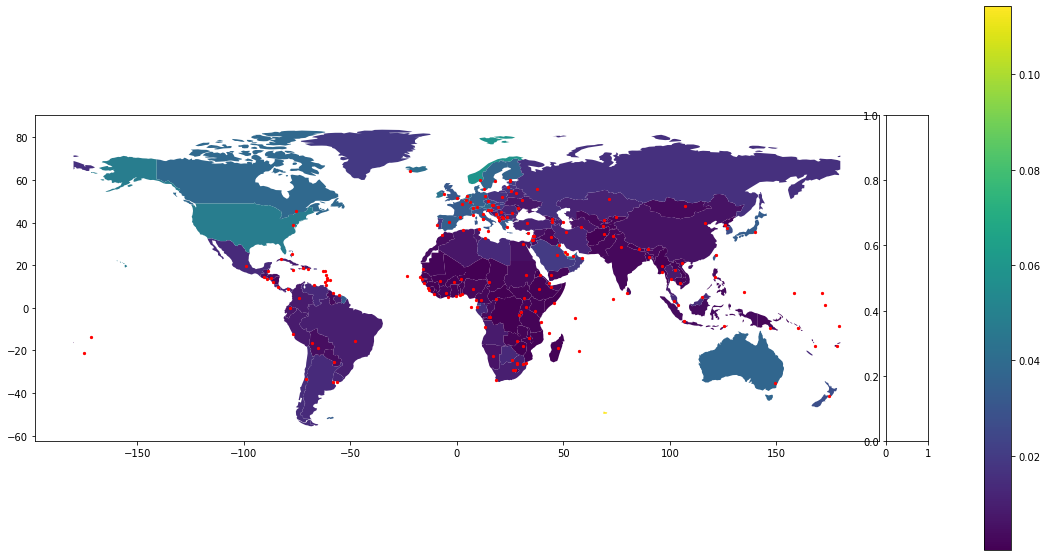

In [91]:
fig, ax = plt.subplots(1,1,  figsize=(20,10) )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad = 0.1)
base = world.plot(column='GDP_Per_Capita', ax=ax, legend=True)
cities.plot(ax=base, marker='o', color='red', markersize=5)

## Plotting Fixed Broadband Map Data - GeoPandas

### Read the data

In [9]:
# Input file path - example
i_file_base_path = "C:/Users/Jeff/OneDrive/Documents/1-NW Boot Camp/PROJECTS/CommTrends/FCC - Mobile Deployment Form 477 Data/"
i_file_vendor_path = "F477_2017_12_Broadband_VerizonWireless/F477_2017_12_Broadband_VerizonWireless_83/"
i_file_name = "VerizonWireless_83"
i_file_extensions = ["dbf", "shp", "shx", "prj"]

In [10]:
# Build the file name -- without extension, which is ok for shapefile
i_file_full = i_file_base_path + i_file_vendor_path + i_file_name + "." + "shp"
i_file_full

'C:/Users/Jeff/OneDrive/Documents/1-NW Boot Camp/PROJECTS/CommTrends/FCC - Mobile Deployment Form 477 Data/F477_2017_12_Broadband_VerizonWireless/F477_2017_12_Broadband_VerizonWireless_83/VerizonWireless_83.shp'

In [11]:
# Read the Fixed Broadband Map shapefile into a GeoPandas GeoDataFrame
fixedbb_df = geopandas.read_file(i_file_full)

In [12]:
fixedbb_df.head()

,DBA,TECHNOLOGY,geometry
0,VerizonWireless,83,POLYGON ((-155.6895931992399 19.08314058305797...
1,VerizonWireless,83,POLYGON ((-155.6374948128956 19.12443481555448...
2,VerizonWireless,83,"POLYGON ((-155.656858360675 19.12478808002589,..."
3,VerizonWireless,83,POLYGON ((-155.6488413780613 19.12680815071968...
4,VerizonWireless,83,POLYGON ((-155.6739225080143 19.12618076811276...


### Plot a subset 

Wall time: 16min 4s


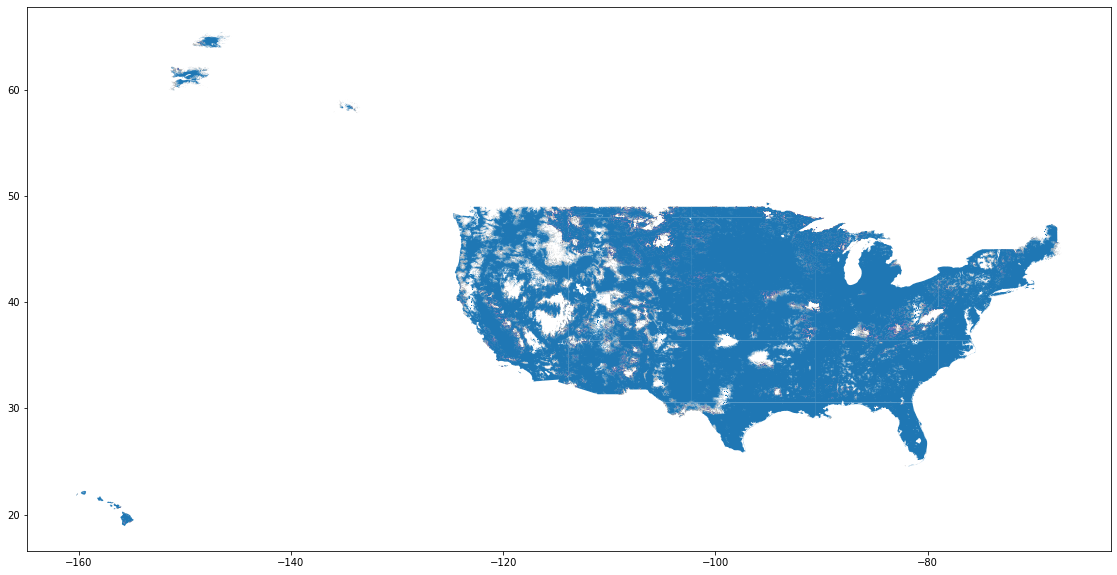

In [22]:
%%time
fixedbb_df.plot( figsize=(20,10) )

In [27]:
fixedbb_df.value_counts()

AttributeError: 'GeoDataFrame' object has no attribute 'value_counts'